### Market Risk- Returns and Risk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_excel('Company_Data2015-1.xlsx')
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
df.describe()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [5]:
df_dict = pd.read_excel('Data_Dictionary.xlsx')
df_dict

,#,Field Name,Description,New Field Name
0,1,Co_Code,Company Code,Co_Code
1,2,Co_Name,Company Name,Co_Name
2,3,Networth Next Year,Value of a company as on 2016 - Next Year(diff...,Networth_Next_Year
3,4,Equity Paid Up,Amount that has been received by the company t...,Equity_Paid_Up
4,5,Networth,Value of a company as on 2015 - Current Year,Networth
...,...,...,...,...
62,64,Debtors Velocity (Days),Average days required for receiving the payments,Debtors_Vel_Days
63,65,Creditors Velocity (Days),Average number of days company takes to pay su...,Creditors_Vel_Days
64,66,Inventory Velocity (Days),Average number of days the company needs to tu...,Inventory_Vel_Days
65,67,Value of Output/Total Assets,Ratio of Value of Output (market value) to Tot...,Value_of_Output_to_Total_Assets


In [6]:
df.columns = df_dict['New Field Name'].to_list()
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Curr_Assets', 'Curr_Liab_and_Prov',
       'Total_Assets_to_Liab', 'Gross_Sales', 'Net_Sales', 'Other_Income',
       'Value_Of_Output', 'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT',
       'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Rev_earn_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv',
       'Cash_Flow_From_Fin', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
  

In [7]:
df.shape

(3586, 67)

In [8]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

<AxesSubplot:>

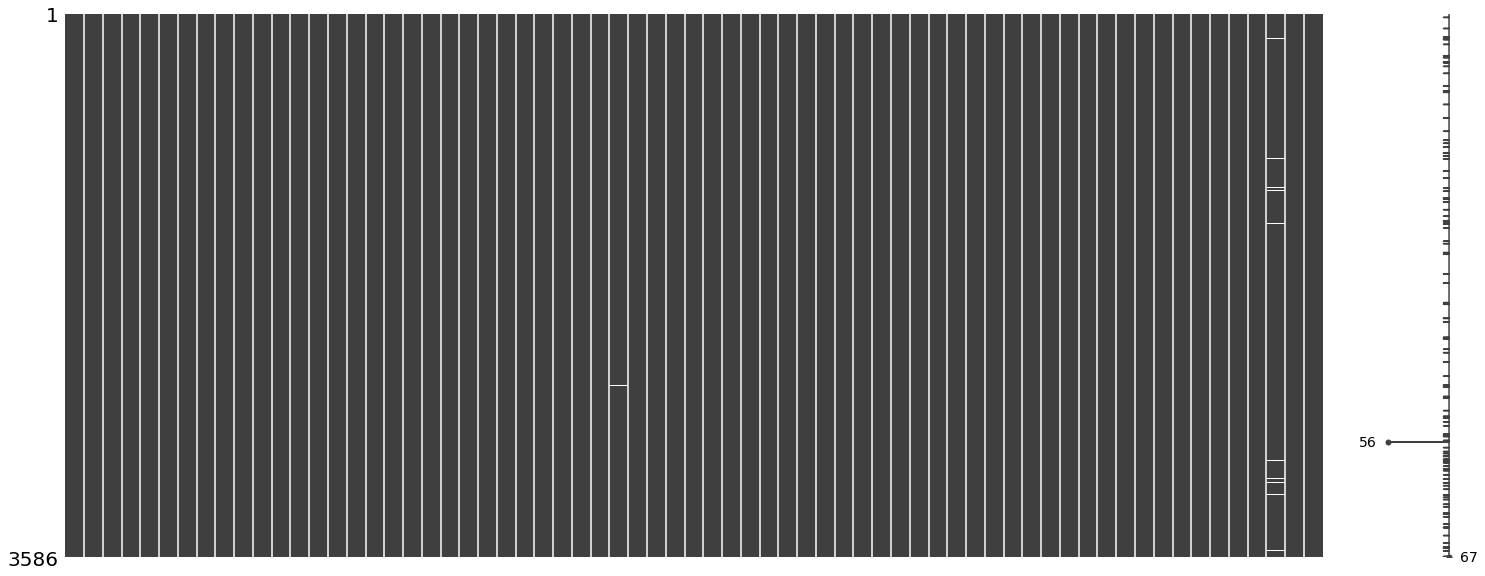

In [10]:
import missingno as msno
msno.matrix(df)

In [11]:
pd.set_option('display.max_rows', 500)

In [12]:
df.isna().sum()

Co_Code                                0
Co_Name                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Curr_Assets                            0
Curr_Liab_and_Prov                     0
Total_Assets_to_Liab                   0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Prod                           0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP              

In [13]:
df.isna().sum()

Co_Code                                0
Co_Name                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Curr_Assets                            0
Curr_Liab_and_Prov                     0
Total_Assets_to_Liab                   0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Prod                           0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP              

In [14]:
df.isna().sum().sum()

118

In [15]:
df.shape

(3586, 67)

In [16]:
df.dropna().shape

(3478, 67)

### Treating missing values in Inventory_Vel_Days variable

In [17]:
df['Inventory_Vel_Days'].fillna(df['Inventory_Vel_Days'].mean(), inplace = True)

In [18]:
df.isna().sum().sum()

15

### Dropping rows with missing values after fixing Inventory_Vel_Days variable

In [19]:
df=df.dropna()

In [20]:
df.shape

(3581, 67)

In [21]:
df.isna().sum().sum()

0

### Checking for duplicate data

In [22]:
df.duplicated().sum()

0

### Dropping unrequired columns

In [24]:
df = df.drop(['Co_Code', 'Co_Name'], axis = 1)
df.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


### Outlier Analysis

In [25]:
#outlier analysis

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
med = df.median()
IQR = q3 - q1

#checking extreme outliers (3x)
upper_limit = q3 + (3 * IQR)   
lower_limit = q1 - (3 * IQR)

### What percent of values in each column are outliers

In [27]:
((df > upper_limit).sum()/len(df)*100).sort_values(ascending=False)

ROG_Rev_exp_in_forex_perc            22.926557
Capital_exp_in_forex                 19.380061
ROG_Rev_earn_in_forex_perc           17.900028
Rev_earn_in_forex                    17.648701
Rev_exp_in_forex                     16.727171
PAT                                  14.884111
Market_Capitalisation                14.744485
PBT                                  14.688634
Adjusted_PAT                         14.632784
CP                                   14.325607
PBDT                                 14.074281
PBIT                                 13.683329
PBIDT                                13.655404
Selling_Cost                         13.292376
Other_Income                         13.236526
Cash_Flow_From_Opr                   13.068975
Networth_Next_Year                   13.041050
Total_Debt                           12.901424
Networth                             12.566322
Capital_Employed                     12.538397
Curr_Ratio_Latest                    12.510472
Curr_Liab_and

In [28]:
((df < lower_limit).sum()/len(df)*100).sort_values(ascending=False)

ROG_Rev_exp_in_forex_perc            22.172577
ROG_Rev_earn_in_forex_perc           18.877409
Cash_Flow_From_Inv                   14.800335
Cash_Flow_From_Fin                   13.739179
APATM_perc_Latest                    11.309690
CPM_perc_Latest                       8.209997
PBDTM_perc_Latest                     7.595644
PBITM_perc_Latest                     7.176766
ROG_Gross_Block_perc                  7.092991
Adjusted_PAT                          6.785814
PAT                                   6.646188
ROG_Net_Worth_perc                    6.450712
ROG_PBT_perc                          6.087685
PBT                                   6.059760
ROG_PAT_perc                          5.836359
ROG_CP_perc                           5.585032
ROG_PBDT_perc                         5.473331
PBIDTM_perc_Latest                    5.110304
ROG_PBIT_perc                         4.691427
ROG_PBIDT_perc                        4.300475
Interest_Cover_Ratio_Latest           3.797822
PBDT         

In [29]:
(((df>upper_limit).sum()+(df<lower_limit).sum())/len(df)*100).sort_values(ascending=False)

ROG_Rev_exp_in_forex_perc            45.099134
ROG_Rev_earn_in_forex_perc           36.777436
Cash_Flow_From_Fin                   21.697850
PAT                                  21.530299
Adjusted_PAT                         21.418598
PBT                                  20.748394
Cash_Flow_From_Inv                   19.491762
Capital_exp_in_forex                 19.380061
APATM_perc_Latest                    18.458531
CP                                   17.955878
PBDT                                 17.844178
Rev_earn_in_forex                    17.648701
Rev_exp_in_forex                     16.727171
Cash_Flow_From_Opr                   16.615471
ROG_Gross_Block_perc                 16.140743
PBIT                                 15.805641
Interest_Cover_Ratio_Latest          15.051662
PBIDT                                15.051662
Market_Capitalisation                14.744485
Networth_Next_Year                   14.213907
ROG_Net_Worth_perc                   13.962580
PBITM_perc_La

Since there are a significant number of records which are outliers, it will change the essence of the data, if we treat outliers. Also the outliers are present due to the nature of the data which comprises small as well as big companies, hence the disparity

### Making the dependent Variable

In [30]:
df['Default']=np.where(df['Networth_Next_Year']<0,1,0)

In [31]:
df.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,1
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,1
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,1


### Converting to X and y

In [32]:
X = df.drop('Default', axis = 1)
y = df['Default']

Feature Selection
Since there are too many columns, we need to determine the columns which are related and eliminate them if possible. We will use VIF to determine the collinearity and eliminate using a threshold of 5.

In [33]:
#vif calculation

def calculate_vif_(X, thresh = 5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True
    
    
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [34]:
X=calculate_vif_(X,5)

dropping 'PBIDT' at index: 16
dropping 'PBDT' at index: 16
dropping 'APATM_perc_Latest' at index: 57
dropping 'ROG_Gross_Sales_perc' at index: 34
dropping 'Net_Sales' at index: 11
dropping 'PBDTM_perc_Latest' at index: 53
dropping 'Value_Of_Output' at index: 12
dropping 'ROG_Total_Assets_perc' at index: 34
dropping 'Capital_Employed' at index: 3
dropping 'Gross_Sales' at index: 9
dropping 'Total_Debt' at index: 3
dropping 'ROG_PBDT_perc' at index: 32
dropping 'ROG_PBIT_perc' at index: 32
dropping 'CP' at index: 15
dropping 'PAT' at index: 13
dropping 'ROG_PBIDT_perc' at index: 29
dropping 'Total_Assets_to_Liab' at index: 7
dropping 'ROG_PBT_perc' at index: 28
dropping 'PBT' at index: 11
dropping 'PBIT' at index: 10
dropping 'Cost_of_Prod' at index: 8
dropping 'Networth' at index: 2
dropping 'PBITM_perc_Latest' at index: 36
dropping 'ROG_CP_perc' at index: 25
dropping 'Cash_Flow_From_Fin' at index: 18
dropping 'ROG_Net_Worth_perc' at index: 18
dropping 'Gross_Block' at index: 2
dropping

In [35]:
X

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,419.36,-1076.34,40.50,7.60,0.00,0.00,0.00,0.00,-167.58,-167.58,...,0.00,0.00,-0.20,0.00,0.00,0,0,45.000000,0.00,0.00
1,1954.93,-1098.88,486.86,46.27,40.51,6.35,143.42,141.17,-15.18,-15.18,...,10.35,0.30,-0.84,-10.30,-57.74,29,101,2.000000,0.31,0.24
2,53.84,4496.25,9097.64,9.55,54.83,0.00,86.36,2.27,94.14,94.14,...,0.42,0.00,-2.21,-5279.14,-7723.67,97,558,0.000000,-0.03,-0.26
3,157.30,-2612.42,1034.12,223.85,3.34,0.89,28.88,0.00,-39.64,-39.64,...,9.26,0.00,-0.16,-3.33,-47.70,93,63,2.000000,0.24,1.90
4,50.30,1836.23,4685.81,9.82,1.97,0.00,15.62,0.00,-212.89,-212.89,...,1.28,0.01,-0.73,-295.55,379.79,3887,346,0.000000,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,501.30,0.00,444633.50,8996.35,187.47,0.00,0.00,0.00,247.39,247.39,...,0.00,0.00,0.00,0.00,0.00,0,0,79.644559,0.60,7.76
3582,296.50,2503.86,11554.45,2008.86,249.20,14429.18,19525.06,11.30,114.87,114.87,...,22.31,0.30,3.18,39.92,30.52,13,53,77.000000,0.29,1.00
3583,2427.95,6376.84,89609.82,5815.66,686.53,16009.99,193979.73,294.88,279.95,69.99,...,55.49,2.62,8.60,8.09,5.69,7,30,48.000000,1.42,3.24
3584,8245.46,11449.79,42353.59,2399.39,71.22,3.41,962.27,2788.44,99.03,99.03,...,9.86,0.39,4.35,28.12,19.55,32,69,42.000000,0.36,0.68


In [36]:
df_new=pd.concat([X,y],axis=1)

In [37]:
df_new

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
0,419.36,-1076.34,40.50,7.60,0.00,0.00,0.00,0.00,-167.58,-167.58,...,0.00,-0.20,0.00,0.00,0,0,45.000000,0.00,0.00,1
1,1954.93,-1098.88,486.86,46.27,40.51,6.35,143.42,141.17,-15.18,-15.18,...,0.30,-0.84,-10.30,-57.74,29,101,2.000000,0.31,0.24,1
2,53.84,4496.25,9097.64,9.55,54.83,0.00,86.36,2.27,94.14,94.14,...,0.00,-2.21,-5279.14,-7723.67,97,558,0.000000,-0.03,-0.26,1
3,157.30,-2612.42,1034.12,223.85,3.34,0.89,28.88,0.00,-39.64,-39.64,...,0.00,-0.16,-3.33,-47.70,93,63,2.000000,0.24,1.90,1
4,50.30,1836.23,4685.81,9.82,1.97,0.00,15.62,0.00,-212.89,-212.89,...,0.01,-0.73,-295.55,379.79,3887,346,0.000000,0.01,0.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,501.30,0.00,444633.50,8996.35,187.47,0.00,0.00,0.00,247.39,247.39,...,0.00,0.00,0.00,0.00,0,0,79.644559,0.60,7.76,0
3582,296.50,2503.86,11554.45,2008.86,249.20,14429.18,19525.06,11.30,114.87,114.87,...,0.30,3.18,39.92,30.52,13,53,77.000000,0.29,1.00,0
3583,2427.95,6376.84,89609.82,5815.66,686.53,16009.99,193979.73,294.88,279.95,69.99,...,2.62,8.60,8.09,5.69,7,30,48.000000,1.42,3.24,0
3584,8245.46,11449.79,42353.59,2399.39,71.22,3.41,962.27,2788.44,99.03,99.03,...,0.39,4.35,28.12,19.55,32,69,42.000000,0.36,0.68,0


### Split of data based on Default Variable

<AxesSubplot:xlabel='Default', ylabel='count'>

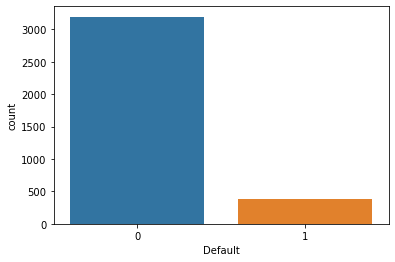

In [38]:
sns.countplot(df_new['Default'])

In [39]:
df_new['Default'].value_counts()

0    3195
1     386
Name: Default, dtype: int64

In [40]:
df_new.groupby(df['Default']).sum()

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
Default,,,,,,,,,,,,,,,,,,,,,
0,214218.10,1462147.61,6968115.21,171778.53,89962.39,464874.78,912428.20,27196.23,586861.65,8085269.63,...,4034.82,68139.00,-124454.16,-463481.66,1982680,5105296,250651.944014,2753.69,220136.43,0
1,11418.37,10954.66,61538.31,2960.36,1662.93,5483.88,6760.43,257.07,-23139.27,-50382.12,...,399.63,-9387.15,-58966.72,-637120.30,182255,2260146,34512.445593,182.03,1773.34,386


Since the data set is very imbalanced. We will apply SMOTE and then we will evaluate all models on both SMOTE as well as NON - SMOTE dataset and compare

In [47]:
df_smote=df_new.copy()

In [48]:
print("Before OverSampling the shape of X: {}".format(X.shape))
print("Before OverSampling the shape of y: {}".format(y.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

Before OverSampling the shape of X: (3581, 34)
Before OverSampling the shape of y: (3581,)
Before OverSampling, counts of label '1': 386
Before OverSampling, counts of label '0': 3195 



In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)

In [51]:
X_smote,y_smote=sm.fit_resample(X,y.ravel())

In [53]:
print("After OverSampling the shape of X: {}".format(X_smote.shape))
print("After OverSampling the shape of y: {}".format(y_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_smote==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_smote==0)))

After OverSampling the shape of X: (6390, 34)
After OverSampling the shape of y: (6390,)
After OverSampling, counts of label '1': 3195
After OverSampling, counts of label '0': 3195 



In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [55]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size = 0.33, random_state = 42, stratify = y_smote)

In [56]:
X_train_all_scaled = X_train.copy()
X_test_all_scaled=X_test.copy()
y_train_all_scaled=y_train.copy()
y_test_all_scaled=y_test.copy()

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_all_scaled=sc.fit_transform(X_train_all_scaled)
X_test_all_scaled=sc.transform(X_test_all_scaled)

In [58]:
X_train_smote_all_scaled = X_train_smote.copy()
X_test_smote_all_scaled=X_test_smote.copy()
y_train_smote_all_scaled=y_train_smote.copy()
y_test_smote_all_scaled=y_test_smote.copy()

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_smote_all_scaled=sc.fit_transform(X_train_smote_all_scaled)
X_test_smote_all_scaled=sc.transform(X_test_smote_all_scaled)

### Concatinating X and y, so they can be used with statsmodel library

In [62]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

In [63]:
df_train

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
2218,3.06,40.94,66.67,0.25,7.65,23.25,23.34,4.82,132.56,132.56,...,1.02,1.13,12.62,9.21,119,37,108.0,0.85,0.70,0
498,5.10,0.39,10.15,1.08,0.01,0.00,0.10,0.00,1.24,1.24,...,2.81,2.24,3.60,2.28,2023,1179,0.0,1.13,2.55,0
1154,5.26,8.87,12.57,0.04,0.00,0.00,4.95,0.00,12.07,12.07,...,3.54,1.29,2.84,0.82,53,19,8.0,3.28,18.12,0
1348,6.25,7.51,12.64,0.02,2.14,0.00,0.00,0.00,13.20,13.20,...,0.42,4.60,44.10,24.96,422,642,47.0,0.27,4.03,0
3540,289.37,-892.08,3862.90,582.42,576.87,9443.51,830.61,25.47,369.50,369.50,...,1.50,3812.16,24.45,17.91,12,40,16.0,1.22,5.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,5.25,74.68,117.52,0.12,0.21,0.00,0.00,0.00,0.71,0.71,...,0.63,1.60,12.02,5.48,481,508,0.0,0.47,2.44,0
143,42.56,35.49,174.83,5.29,23.35,269.59,123.31,0.65,-8.40,-8.40,...,5.23,-0.44,-1.26,-5.11,41,30,58.0,1.81,1.87,1
1522,15.50,6.56,7.30,0.00,0.12,0.45,0.01,0.00,0.80,0.80,...,0.13,0.00,8.12,8.97,601,12,629.0,0.15,0.08,0
14,67.27,-197.77,131.31,8.45,0.21,0.00,0.34,0.00,-119.54,-119.54,...,0.00,-1.40,-78.94,-138.85,34,160,81.0,0.52,0.24,1


In [64]:
df_test

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
1682,11.75,3.01,3.38,0.62,0.15,0.00,0.00,0.00,13.30,13.30,...,0.24,1.53,22.67,9.96,17,26,77.0,0.24,0.23,0
3260,25.98,478.87,855.19,28.00,83.82,1032.47,225.05,0.14,332.14,332.14,...,0.82,5.28,33.27,21.13,15,58,150.0,0.68,1.16,0
2156,9.34,7.40,59.65,1.48,0.00,0.00,0.00,0.00,34.56,34.56,...,1.55,2.47,10.54,5.93,39,116,99.0,1.18,2.39,0
3295,7.35,424.45,1960.66,42.31,267.03,1166.70,321.98,3.49,1046.88,1046.88,...,2.08,7.84,10.53,7.27,94,110,58.0,1.04,3.63,0
1311,5.05,2.82,4.30,0.23,0.03,10.55,0.05,0.00,16.15,16.15,...,1.31,3.74,8.52,5.51,98,5,0.0,1.20,1.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,8.90,112.20,130.61,0.30,17.62,279.55,7.73,0.00,91.86,73.49,...,3.66,2.09,5.40,2.94,44,6,34.0,3.18,4.76,0
451,0.35,0.02,0.06,0.00,0.01,0.00,0.00,0.00,0.94,0.94,...,0.24,0.00,0.00,0.00,0,0,0.0,0.20,0.00,0
1058,3.69,2.52,2.72,0.23,0.03,1.41,0.01,0.00,10.67,10.67,...,0.00,1.00,0.00,0.00,29,3,27.0,0.00,0.00,0
2378,5.29,49.48,153.78,3.82,53.80,30.19,6.28,0.00,111.42,111.42,...,5.18,16.93,12.53,8.10,28,34,71.0,2.71,10.72,0


In [65]:
df_train_smote = pd.concat([X_train_smote, pd.DataFrame(y_train_smote,index=X_train_smote.index)], axis = 1)
df_test_smote = pd.concat([X_test_smote, pd.DataFrame(y_test_smote,index=X_test_smote.index)], axis = 1)

In [66]:
df_train_smote.columns=[                   'Equity_Paid_Up',
                     'Net_Working_Capital',
                             'Curr_Assets',
                            'Other_Income',
                            'Selling_Cost',
                       'Rev_earn_in_forex',
                        'Rev_exp_in_forex',
                    'Capital_exp_in_forex',
                    'Book_Value_Unit_Curr',
                'Book_Value_Adj_Unit_Curr',
                   'Market_Capitalisation',
               'CEPS_annualised_Unit_Curr',
                      'Cash_Flow_From_Opr',
                      'Cash_Flow_From_Inv',
               'ROG_Capital_Employed_perc',
                    'ROG_Gross_Block_perc',
                      'ROG_Net_Sales_perc',
                   'ROG_Cost_of_Prod_perc',
                            'ROG_PAT_perc',
              'ROG_Rev_earn_in_forex_perc',
               'ROG_Rev_exp_in_forex_perc',
          'ROG_Market_Capitalisation_perc',
                       'Curr_Ratio_Latest',
                  'Inventory_Ratio_Latest',
                    'Debtors_Ratio_Latest',
       'Total_Asset_Turnover_Ratio_Latest',
             'Interest_Cover_Ratio_Latest',
                      'PBIDTM_perc_Latest',
                         'CPM_perc_Latest',
                        'Debtors_Vel_Days',
                      'Creditors_Vel_Days',
                      'Inventory_Vel_Days',
         'Value_of_Output_to_Total_Assets',
          'Value_of_Output_to_Gross_Block',
                        'Default']
df_train_smote

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
4223,7.347672,7.020814,15.989639,5.816834,0.560601,6.752390,0.442210,0.000000,-2.623808,-2.623808,...,1.204066,0.047095,-17.784282,-73.110859,66,37,112.552142,0.973436,0.745392,1
3493,58.010000,3321.460000,5247.240000,123.720000,376.330000,2110.860000,2560.660000,72.470000,194.310000,194.310000,...,0.580000,2.240000,18.370000,9.220000,75,31,124.000000,0.580000,1.040000,0
2844,11.560000,135.650000,267.950000,3.250000,11.670000,95.910000,146.260000,2.890000,161.570000,80.790000,...,4.350000,4.550000,5.480000,3.540000,58,55,39.000000,2.120000,3.420000,0
4221,8.509298,0.610611,1.269695,10.223334,0.010000,0.004309,0.008618,0.000000,-0.634595,-0.634595,...,0.453878,-1.723518,3.425494,3.425494,14,398,0.000000,0.359677,0.000000,1
5583,3.960926,-12.222521,1.994483,0.000000,0.001584,0.000000,0.000000,0.000000,-30.534538,-30.534538,...,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,5.590000,19.890000,28.630000,2.420000,1.310000,0.000000,0.000000,0.000000,50.670000,50.670000,...,0.900000,3.150000,14.060000,8.670000,41,38,52.000000,0.950000,2.530000,0
1231,0.500000,5.660000,16.670000,0.020000,1.000000,0.000000,0.000000,0.000000,93.680000,31.230000,...,4.190000,3.970000,7.880000,4.490000,58,5,0.000000,4.020000,12.010000,0
4528,38.063388,70.952532,109.997387,11.169226,2.001923,67.912435,5.000147,1.534478,-23.234465,-23.234465,...,1.040901,-19.118507,-11.458420,-13.064260,95,61,81.695859,0.841460,4.561193,1
3629,3.371029,-0.013994,0.029000,0.084003,0.001999,0.000000,0.000000,0.000000,-0.698709,-0.698709,...,0.000000,0.000000,0.000000,0.000000,0,12,0.000000,0.000000,0.000000,1


In [67]:
df_test_smote.columns=['Equity_Paid_Up',
                     'Net_Working_Capital',
                             'Curr_Assets',
                            'Other_Income',
                            'Selling_Cost',
                       'Rev_earn_in_forex',
                        'Rev_exp_in_forex',
                    'Capital_exp_in_forex',
                    'Book_Value_Unit_Curr',
                'Book_Value_Adj_Unit_Curr',
                   'Market_Capitalisation',
               'CEPS_annualised_Unit_Curr',
                      'Cash_Flow_From_Opr',
                      'Cash_Flow_From_Inv',
               'ROG_Capital_Employed_perc',
                    'ROG_Gross_Block_perc',
                      'ROG_Net_Sales_perc',
                   'ROG_Cost_of_Prod_perc',
                            'ROG_PAT_perc',
              'ROG_Rev_earn_in_forex_perc',
               'ROG_Rev_exp_in_forex_perc',
          'ROG_Market_Capitalisation_perc',
                       'Curr_Ratio_Latest',
                  'Inventory_Ratio_Latest',
                    'Debtors_Ratio_Latest',
       'Total_Asset_Turnover_Ratio_Latest',
             'Interest_Cover_Ratio_Latest',
                      'PBIDTM_perc_Latest',
                         'CPM_perc_Latest',
                        'Debtors_Vel_Days',
                      'Creditors_Vel_Days',
                      'Inventory_Vel_Days',
         'Value_of_Output_to_Total_Assets',
          'Value_of_Output_to_Gross_Block',
                       'Default']

df_test_smote

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
2835,22.380000,78.410000,103.390000,8.640000,21.150000,127.530000,8.420000,0.29,78.560000,78.560000,...,0.840000,21.030000,16.250000,11.690000,72,24,89.000000,0.780000,1.480000,0
397,3.480000,1.590000,1.590000,0.000000,0.000000,0.000000,0.000000,0.00,4.630000,4.630000,...,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0
6079,17.176523,-10.459328,21.625558,6.387596,0.541956,0.068453,0.000000,0.00,-23.919190,-23.919190,...,0.000000,-0.162576,2.045041,-5.305127,27,51,72.731581,0.838552,0.367936,1
1238,3.360000,7.660000,8.350000,0.450000,0.260000,2.030000,0.000000,0.00,22.110000,22.110000,...,0.730000,-1.090000,-3.100000,-9.950000,29,10,254.000000,0.650000,0.880000,0
5033,8.221044,-0.404253,0.508410,0.248232,0.000000,0.000000,0.000000,0.00,-13.115452,-13.115452,...,0.000000,-47.389800,0.000000,0.000000,0,659,750.761849,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,15.910000,5.100000,15.710000,0.070000,0.020000,0.000000,0.000000,0.00,6.280000,6.280000,...,0.420000,-70.330000,-0.450000,4.160000,196,201,202.000000,0.240000,0.280000,0
5567,5.449801,0.012240,0.082071,0.000317,0.000000,0.000000,0.000317,0.00,-1.392903,-1.366660,...,0.007294,0.013320,0.157302,0.256804,0,0,0.000000,0.002537,0.001982,1
705,3.000000,1.770000,1.890000,0.000000,0.000000,0.000000,0.000000,0.00,10.020000,10.020000,...,0.050000,0.000000,38.890000,77.780000,0,0,0.000000,0.050000,0.000000,0
2666,5.240000,53.720000,74.820000,1.640000,2.580000,72.720000,2.170000,0.45,217.570000,217.570000,...,0.480000,3.210000,16.160000,11.140000,112,45,149.000000,0.450000,1.110000,0


In [68]:
col=[]
for i in df_train.columns[:-1]:
    col.append(i)

In [69]:
col

['Equity_Paid_Up',
 'Net_Working_Capital',
 'Curr_Assets',
 'Other_Income',
 'Selling_Cost',
 'Rev_earn_in_forex',
 'Rev_exp_in_forex',
 'Capital_exp_in_forex',
 'Book_Value_Unit_Curr',
 'Book_Value_Adj_Unit_Curr',
 'Market_Capitalisation',
 'CEPS_annualised_Unit_Curr',
 'Cash_Flow_From_Opr',
 'Cash_Flow_From_Inv',
 'ROG_Capital_Employed_perc',
 'ROG_Gross_Block_perc',
 'ROG_Net_Sales_perc',
 'ROG_Cost_of_Prod_perc',
 'ROG_PAT_perc',
 'ROG_Rev_earn_in_forex_perc',
 'ROG_Rev_exp_in_forex_perc',
 'ROG_Market_Capitalisation_perc',
 'Curr_Ratio_Latest',
 'Inventory_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Total_Asset_Turnover_Ratio_Latest',
 'Interest_Cover_Ratio_Latest',
 'PBIDTM_perc_Latest',
 'CPM_perc_Latest',
 'Debtors_Vel_Days',
 'Creditors_Vel_Days',
 'Inventory_Vel_Days',
 'Value_of_Output_to_Total_Assets',
 'Value_of_Output_to_Gross_Block']

Model Building using Logistic Regression for 'Probability at default'
Statsmodels Logit Modeling with backward elimination.
After each model is built, the variable that has a p-value of >0.05 will be dropped as their coefficients are unreliable.

In [70]:
def metrics_eval(df,model,count,train_test,optimal_threshold_ip):
    y_prob_pred = model.predict(df)
    highest_pvalue_col_name=model.pvalues.sort_values(ascending = False).head(1).index.to_list()[0]
    highest_pvalue=model.pvalues.sort_values(ascending = False).head(1).values[0]
    if train_test=='train':
        fpr, tpr, thresholds = roc_curve(df['Default'], y_prob_pred)
        auc = roc_auc_score(df['Default'], y_prob_pred)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]
    elif train_test=='test':
        auc = roc_auc_score(df['Default'], y_prob_pred)
        optimal_threshold=optimal_threshold_ip      
    y_class_pred=[]
    for i in range(0,len(y_prob_pred)):
        if np.array(y_prob_pred)[i] > optimal_threshold:
            a=1
        else:
            a=0
        y_class_pred.append(a)
    dict_metrics={'ModelType':'Logit',
        'Model_Name':'Model_'+str(count),
          'Accuracy':accuracy_score(df['Default'], y_class_pred),
          'F1 Score':f1_score(df['Default'], y_class_pred),
          'Recall':recall_score(df['Default'], y_class_pred),
          'Precision':precision_score(df['Default'], y_class_pred),
                  'AUC':auc,
                  'Optimal_Thresh':optimal_threshold,
                 'Dropped_Column':highest_pvalue_col_name,
                 'Dropped_col_pvalue':highest_pvalue}
    return dict_metrics,optimal_threshold

In [71]:
def logit_model_eval(df_train,df_test,num_of_models):
    df_metrics_test=pd.DataFrame(columns=['ModelType','Model_Name','Accuracy','F1 Score','Recall','Precision',
                                          'AUC',
                                          'Optimal_Thresh',
                                          'Dropped_Column',
                                         'Dropped_col_pvalue'])
    df_metrics_train=pd.DataFrame(columns=['ModelType','Model_Name','Accuracy','F1 Score','Recall','Precision',
                                           'Optimal_Thresh','AUC',
                                           'Dropped_Column','Dropped_col_pvalue'])
    model_list=[]
    col=[]
    for i in df_train.columns[:-1]:
        col.append(i)
    count=1
    for i in np.arange(1,num_of_models):
        text=""
        j=0
        for k in col:
            if j==0:
                j=j+1
                text='Default ~ '
            if j==1:
                j=j+1
                text=text+k
            else:
                text=text+" + "+k
        model = SM.logit(formula = text, data = df_train).fit(maxiter = 10000, method = 'bfgs',disp=0)
        highest_pvalue=model.pvalues.sort_values(ascending = False).head(1).values[0]
        highest_pvalue_col_name=model.pvalues.sort_values(ascending = False).head(1).index.to_list()[0]

        if highest_pvalue > 0.05:
            col=list(filter(lambda x: x != highest_pvalue_col_name,col))
            #-------------------------------validation Train Set -----------------------------------
            dict_metrics_train,optimal_threshold_op=metrics_eval(df_train,model,count,train_test="train",
                                                              optimal_threshold_ip=None)
            df_metrics_train=df_metrics_train.append(dict_metrics_train,ignore_index=True)
            #print("train model number"+str(count))
            #-------------------------------validation Test Set -----------------------------------
            dict_metrics_test,optimal_threshold_op=metrics_eval(df_test,model,count,train_test="test",
                                           optimal_threshold_ip=optimal_threshold_op)
            df_metrics_test=df_metrics_test.append(dict_metrics_test,ignore_index=True)
            #print("test model number"+str(count))
            model_list.append(model)
            count=count+1
            continue
        else:
            #-------------------------------validation Train Set -----------------------------------
            dict_metrics_train,optimal_threshold_op=metrics_eval(df_train,model,count,train_test="train",
                                                              optimal_threshold_ip=None)
            df_metrics_train=df_metrics_train.append(dict_metrics_train,ignore_index=True)
            #-------------------------------validation Test Set -----------------------------------
            dict_metrics_test,optimal_threshold_op=metrics_eval(df_test,model,count,train_test="test",
                                           optimal_threshold_ip=optimal_threshold_op)
            df_metrics_test=df_metrics_test.append(dict_metrics_test,ignore_index=True)
            model_list.append(model)
            count=count+1
            break
    return model_list,df_metrics_train,df_metrics_test

In [73]:
model_list,df_metrics_train_logit,df_metrics_test_logit=logit_model_eval(df_train,df_test,num_of_models=300)

In [74]:
df_metrics_train_logit.sort_values(by='Accuracy',ascending=False)

,ModelType,Model_Name,Accuracy,F1 Score,Recall,Precision,Optimal_Thresh,AUC,Dropped_Column,Dropped_col_pvalue
29,Logit,Model_30,0.958316,0.822695,0.895753,0.760656,0.247407,0.975275,Inventory_Ratio_Latest,0.094421
30,Logit,Model_31,0.956232,0.816112,0.899614,0.746795,0.241328,0.975041,Intercept,0.008277
10,Logit,Model_11,0.952897,0.806838,0.911197,0.723926,0.219286,0.976901,Book_Value_Adj_Unit_Curr,0.596393
9,Logit,Model_10,0.952480,0.805461,0.911197,0.721713,0.217851,0.976899,Rev_exp_in_forex,0.627172
14,Logit,Model_15,0.952480,0.806780,0.918919,0.719033,0.217665,0.976802,Debtors_Ratio_Latest,0.495728
11,Logit,Model_12,0.952480,0.805461,0.911197,0.721713,0.218126,0.976877,ROG_Market_Capitalisation_perc,0.594895
13,Logit,Model_14,0.952063,0.804754,0.915058,0.718182,0.216755,0.976769,Total_Asset_Turnover_Ratio_Latest,0.525161
15,Logit,Model_16,0.952063,0.804754,0.915058,0.718182,0.217733,0.976758,ROG_Net_Sales_perc,0.468116
12,Logit,Model_13,0.951647,0.802721,0.911197,0.717325,0.218326,0.976848,ROG_Capital_Employed_perc,0.544502
16,Logit,Model_17,0.950396,0.799325,0.915058,0.709581,0.216078,0.976749,Debtors_Vel_Days,0.469351


In [75]:
df_metrics_test_logit.sort_values(by='Accuracy',ascending=False)

,ModelType,Model_Name,Accuracy,F1 Score,Recall,Precision,AUC,Optimal_Thresh,Dropped_Column,Dropped_col_pvalue
30,Logit,Model_31,0.952623,0.802817,0.897638,0.726115,0.956256,0.241328,Intercept,0.008277
29,Logit,Model_30,0.952623,0.802817,0.897638,0.726115,0.956629,0.247407,Inventory_Ratio_Latest,0.094421
25,Logit,Model_26,0.939932,0.764120,0.905512,0.660920,0.949013,0.207759,Market_Capitalisation,0.261061
22,Logit,Model_23,0.939086,0.763158,0.913386,0.655367,0.948502,0.208713,Cash_Flow_From_Opr,0.712347
21,Logit,Model_22,0.939086,0.763158,0.913386,0.655367,0.948233,0.208683,Rev_earn_in_forex,0.855884
24,Logit,Model_25,0.938240,0.759076,0.905512,0.653409,0.948614,0.208039,CPM_perc_Latest,0.322666
23,Logit,Model_24,0.938240,0.759076,0.905512,0.653409,0.948800,0.208356,Curr_Assets,0.447208
27,Logit,Model_28,0.937394,0.754967,0.897638,0.651429,0.947326,0.201248,ROG_Gross_Block_perc,0.160827
16,Logit,Model_17,0.934010,0.743421,0.889764,0.638418,0.944031,0.216078,Debtors_Vel_Days,0.469351
28,Logit,Model_29,0.934010,0.748387,0.913386,0.633880,0.955756,0.197805,ROG_PAT_perc,0.170844


### Finding the best model

In [76]:
model_list

In [77]:
best_model=model_list[df_metrics_test_logit.sort_values(by='Accuracy',ascending=False).index[0]]
best_model

In [78]:
print(best_model.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                            4
Date:                Fri, 14 Jan 2022   Pseudo R-squ.:                  0.6358
Time:                        23:22:37   Log-Likelihood:                -299.04
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                1.067e-224
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.3898      0.148     -2.641      0.008      -0.679      -0.100
Book_Value_Unit_Curr           -0.1514      0.012    -12.174      0.000      -0.

### Training Set

In [79]:
y_prob_pred_train = best_model.predict(df_train)

In [80]:
fpr, tpr, thresholds = roc_curve(df_train['Default'], y_prob_pred_train)

In [81]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.24132824091512953

In [82]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

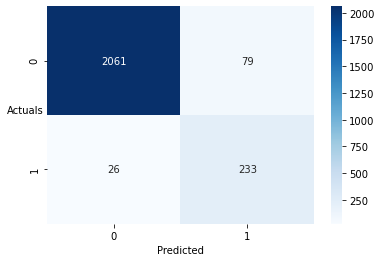

In [83]:
sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [84]:
print(metrics.classification_report(df_train['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.988     0.963     0.975      2140
           1      0.747     0.900     0.816       259

    accuracy                          0.956      2399
   macro avg      0.867     0.931     0.896      2399
weighted avg      0.962     0.956     0.958      2399



AUC: 0.975


Text(0.5, 1.0, 'Train Data - ROC Curve')

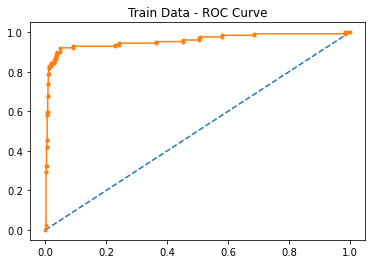

In [92]:
auc = roc_auc_score(df_train['Default'], y_prob_pred_train)
print('AUC: %.3f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Train Data - ROC Curve')

### Test Set

In [86]:
y_prob_pred_test = best_model.predict(df_test)

In [87]:
fpr, tpr, thresholds = roc_curve(df_test['Default'], y_prob_pred_test)

In [88]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

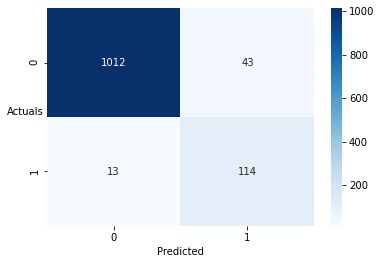

In [89]:
sns.heatmap((metrics.confusion_matrix(df_test['Default'], y_class_pred)), annot = True,fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [90]:
print(metrics.classification_report(df_test['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.987     0.959     0.973      1055
           1      0.726     0.898     0.803       127

    accuracy                          0.953      1182
   macro avg      0.857     0.928     0.888      1182
weighted avg      0.959     0.953     0.955      1182



AUC: 0.956


Text(0.5, 1.0, 'Test Data - ROC Curve')

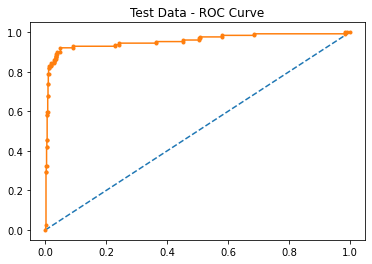

In [91]:
auc = roc_auc_score(df_test['Default'], y_prob_pred_test)
print('AUC: %.3f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Test Data - ROC Curve')

### Final Metrics - Logit using SM without SMOTE

In [93]:
final_logit_sm_metrics=pd.concat([df_metrics_train_logit.sort_values(by='Accuracy',ascending=False)[['Accuracy','Precision','Recall',
                                                                              'F1 Score','AUC']
                                                                            ].head(1),
           df_metrics_test_logit.sort_values(by='Accuracy',ascending=False)[['Accuracy','Precision','Recall',
                                                                             'F1 Score','AUC']
                                                                           ].head(1)])
final_logit_sm_metrics.index=['Logit_SM_Train','Logit_SM_Test']

In [94]:
final_logit_sm_metrics

,Accuracy,Precision,Recall,F1 Score,AUC
Logit_SM_Train,0.958316,0.760656,0.895753,0.822695,0.975275
Logit_SM_Test,0.952623,0.726115,0.897638,0.802817,0.956256


### Evaluating for SMOTE data

In [95]:
model_list_smote,df_metrics_train_smote_logit,df_metrics_test_smote_logit=logit_model_eval(df_train_smote, df_test_smote, num_of_models=200)

C:\Users\Aditya Rishi\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
df_metrics_train_smote_logit.sort_values(by='Accuracy',ascending=False)

,ModelType,Model_Name,Accuracy,F1 Score,Recall,Precision,Optimal_Thresh,AUC,Dropped_Column,Dropped_col_pvalue
17,Logit,Model_18,0.950245,0.948712,0.920131,0.979125,0.692248,0.981177,Creditors_Vel_Days,0.055022
0,Logit,Model_1,0.948844,0.947520,0.923400,0.972933,0.685303,0.982360,PBIDTM_perc_Latest,0.859589
1,Logit,Model_2,0.948844,0.947444,0.921999,0.974334,0.687381,0.982361,Equity_Paid_Up,0.841399
5,Logit,Model_6,0.948610,0.947267,0.922933,0.972920,0.683443,0.982355,Curr_Assets,0.704788
6,Logit,Model_7,0.948610,0.947242,0.922466,0.973386,0.684417,0.982338,ROG_Cost_of_Prod_perc,0.486819
18,Logit,Model_19,0.948610,0.947115,0.920131,0.975731,0.689968,0.980369,Selling_Cost,0.020782
4,Logit,Model_5,0.948610,0.947192,0.921532,0.974321,0.688237,0.982355,ROG_Gross_Block_perc,0.733462
3,Logit,Model_4,0.948610,0.947192,0.921532,0.974321,0.687949,0.982362,Rev_exp_in_forex,0.773915
7,Logit,Model_8,0.947909,0.946510,0.921532,0.972880,0.684858,0.982310,ROG_Market_Capitalisation_perc,0.469363
8,Logit,Model_9,0.947676,0.946283,0.921532,0.972400,0.683350,0.982322,ROG_Rev_exp_in_forex_perc,0.418350


In [97]:
df_metrics_test_smote_logit.sort_values(by='Accuracy',ascending=False)

,ModelType,Model_Name,Accuracy,F1 Score,Recall,Precision,AUC,Optimal_Thresh,Dropped_Column,Dropped_col_pvalue
17,Logit,Model_18,0.945472,0.944418,0.926945,0.962562,0.974799,0.692248,Creditors_Vel_Days,0.055022
18,Logit,Model_19,0.944049,0.942829,0.923150,0.963366,0.974473,0.689968,Selling_Cost,0.020782
13,Logit,Model_14,0.943575,0.942595,0.926945,0.958783,0.974694,0.683587,Inventory_Vel_Days,0.075108
1,Logit,Model_2,0.942627,0.941404,0.922201,0.961424,0.975607,0.687381,Equity_Paid_Up,0.841399
3,Logit,Model_4,0.942153,0.940949,0.922201,0.960474,0.975415,0.687949,Rev_exp_in_forex,0.773915
12,Logit,Model_13,0.942153,0.941063,0.924099,0.958661,0.975445,0.684699,Debtors_Vel_Days,0.078762
4,Logit,Model_5,0.941679,0.940436,0.921252,0.960435,0.975299,0.688237,ROG_Gross_Block_perc,0.733462
6,Logit,Model_7,0.941679,0.940493,0.922201,0.959526,0.975382,0.684417,ROG_Cost_of_Prod_perc,0.486819
14,Logit,Model_15,0.941204,0.940499,0.929791,0.951456,0.974629,0.662035,Debtors_Ratio_Latest,0.069276
0,Logit,Model_1,0.941204,0.940039,0.922201,0.958580,0.975621,0.685303,PBIDTM_perc_Latest,0.859589


In [98]:
best_model_smote=model_list[df_metrics_test_smote_logit.sort_values(by='Accuracy',ascending=False).index[0]]
best_model_smote

In [99]:
print(best_model_smote.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           17
Date:                Fri, 14 Jan 2022   Pseudo R-squ.:                  0.6508
Time:                        23:30:32   Log-Likelihood:                -286.68
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                1.821e-216
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2385      0.162     -1.469      0.142      -0.557       0.080
Net_Working_Capital                 0.0003      0.000      1.581    

In [100]:
y_prob_pred_train_smote = best_model_smote.predict(df_train_smote)

In [101]:
fpr_smote, tpr_smote, thresholds_smote = roc_curve(df_train_smote['Default'], y_prob_pred_train_smote)

In [102]:
optimal_idx_smote = np.argmax(tpr_smote - fpr_smote)
optimal_threshold_smote = thresholds_smote[optimal_idx_smote]
optimal_threshold_smote

0.21506362852957905

In [103]:
y_class_pred_smote=[]
for i in range(0,len(y_prob_pred_train_smote)):
    if np.array(y_prob_pred_train_smote)[i] > optimal_threshold_smote:
        a=1
    else:
        a=0
    y_class_pred_smote.append(a)

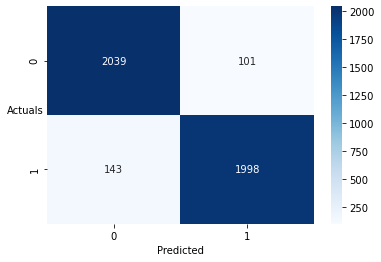

In [104]:
sns.heatmap((metrics.confusion_matrix(df_train_smote['Default'],y_class_pred_smote)),annot=True,
            fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [105]:
print(metrics.classification_report(df_train_smote['Default'], y_class_pred_smote, digits=3))

              precision    recall  f1-score   support

           0      0.934     0.953     0.944      2140
           1      0.952     0.933     0.942      2141

    accuracy                          0.943      4281
   macro avg      0.943     0.943     0.943      4281
weighted avg      0.943     0.943     0.943      4281



AUC: 0.975


Text(0.5, 1.0, 'Train Data - ROC Curve')

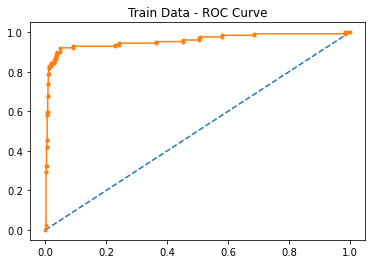

In [109]:
auc = roc_auc_score(df_train_smote['Default'], y_prob_pred_train_smote)
print('AUC: %.3f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Train Data - ROC Curve')

In [107]:
y_prob_pred_test_smote = best_model_smote.predict(df_test_smote)

In [108]:
y_class_pred_smote=[]
for i in range(0,len(y_prob_pred_test_smote)):
    if np.array(y_prob_pred_test_smote)[i] > optimal_threshold_smote:
        a=1
    else:
        a=0
    y_class_pred_smote.append(a)

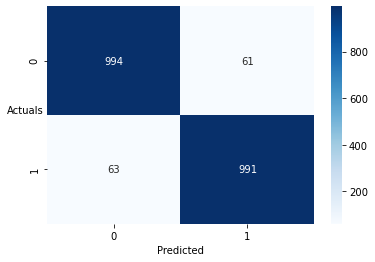

In [110]:
sns.heatmap((metrics.confusion_matrix(df_test_smote['Default'], y_class_pred_smote)), annot = True,
            fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [111]:
print(metrics.classification_report(df_test_smote['Default'], y_class_pred_smote, digits=3))

              precision    recall  f1-score   support

           0      0.940     0.942     0.941      1055
           1      0.942     0.940     0.941      1054

    accuracy                          0.941      2109
   macro avg      0.941     0.941     0.941      2109
weighted avg      0.941     0.941     0.941      2109



AUC: 0.970


Text(0.5, 1.0, 'Test Data - ROC Curve')

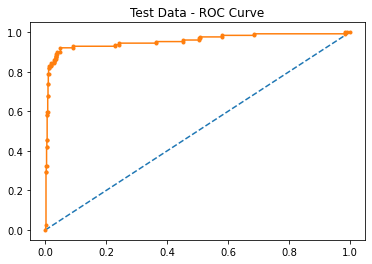

In [112]:
auc = roc_auc_score(df_test_smote['Default'], y_prob_pred_test_smote)
print('AUC: %.3f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Test Data - ROC Curve')

### Final Metrics - Logit using SM with SMOTE

In [113]:
final_logit_sm_smote_metrics=pd.concat([df_metrics_train_smote_logit.sort_values(by='Accuracy',ascending=False)[['Accuracy','Precision','Recall',
                                                                              'F1 Score','AUC']
                                                                            ].head(1),
           df_metrics_test_smote_logit.sort_values(by='Accuracy',ascending=False)[['Accuracy','Precision','Recall',
                                                                             'F1 Score','AUC']
                                                                           ].head(1)])
final_logit_sm_smote_metrics.index=['Logit_SM_Train_SMOTE','Logit_SM_Test_SMOTE']

In [114]:
final_logit_sm_smote_metrics

,Accuracy,Precision,Recall,F1 Score,AUC
Logit_SM_Train_SMOTE,0.950245,0.979125,0.920131,0.948712,0.981177
Logit_SM_Test_SMOTE,0.945472,0.962562,0.926945,0.944418,0.974799


### Generic Function for other models

In [123]:
def apply_evl(name,model,param_grid,X_train,X_test,y_train,y_test):
    test_metrics_dict={}
    train_metrics_dict={}
    from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
    from sklearn.model_selection import GridSearchCV
    print(name)
    if param_grid!=None:    
        grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3,n_jobs=4)
        gs=grid_search.fit(X_train,y_train)
        print("--------------------Best Parameters--------------------")
        print(gs.best_params_)
        best_model=gs.best_estimator_
        print()
        print()
        print("--------------------Best Model Params--------------------")
        print(best_model)
        print()
        print()
        ytrain_predict = best_model.predict(X_train)
        ytest_predict = best_model.predict(X_test)
    elif param_grid == None:
        best_model=model
        best_model.fit(X_train,y_train)
        ytrain_predict = best_model.predict(X_train)
        ytest_predict = best_model.predict(X_test)
    
    print("Train Accuracy Score for model {} is {}".format(model,accuracy_score(y_train,ytrain_predict)))
    print()
    print()
    print("--------------------Classification Report - Train Data--------------------")
    print(classification_report(y_train,ytrain_predict))
    print("------------------------------------------------------------")
    print()
    print()
    sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',
            cbar=False,cmap='YlGnBu')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix - Train Data')
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        # AUC and ROC for the training data

    # predict probabilities
    probs = best_model.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_train, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    from sklearn.metrics import roc_curve
    fpr_train, tpr_train, thresholds = roc_curve(y_train, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.title('Train Data - ROC Curve')
    # show the plot
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        
#     train_metrics_dict.update({"Accuracy":accuracy_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"Precision":precision_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"Recall":recall_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"F1":f1_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"AUC":roc_auc_score(y_train,probs)})
#     train_metrics_df=pd.DataFrame(train_metrics_dict,index=[name+"_Train"]).T

    train_metrics_dict.update({name+"_Train":[accuracy_score(y_train,ytrain_predict),precision_score(y_train,ytrain_predict),
                                                recall_score(y_train,ytrain_predict),f1_score(y_train,ytrain_predict),
                                                roc_auc_score(y_train,probs),fpr_train,tpr_train]})
    train_metrics_df=pd.DataFrame(train_metrics_dict,index=['Accuracy','Precision','Recall','F1','AUC','FPR', 'TPR'])
    
    
    print()
    print()
    
    print("Test Accuracy Score for model {} is {}".format(model,accuracy_score(y_test,ytest_predict)))
    print()
    print()
    print("--------------------Classification Report - Test Data--------------------")
    print(classification_report(y_test,ytest_predict))
    print("------------------------------------------------------------")
    print()
    print()
    sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',
            cbar=False,cmap='YlGnBu')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix - Test Data')
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        # AUC and ROC for the training data

    # predict probabilities
    probs = best_model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    from sklearn.metrics import roc_curve
    fpr_test, tpr_test, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr_test, tpr_test, marker='.')
    plt.title('Test Data - ROC Curve')
    # show the plot
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
       
    
    test_metrics_dict.update({name+"_Test":[accuracy_score(y_test,ytest_predict),precision_score(y_test,ytest_predict),
                                            recall_score(y_test,ytest_predict),f1_score(y_test,ytest_predict),
                                            roc_auc_score(y_test,probs),fpr_test,tpr_test]})
    test_metrics_df=pd.DataFrame(test_metrics_dict,index=['Accuracy','Precision','Recall','F1','AUC','FPR','TPR'])
    return pd.concat([train_metrics_df,test_metrics_df],axis=1),best_model

### Logit Using Sklearn - All Unscaled Without SMOTE

In [124]:
param_grid_lr_unscaled={'penalty':['l1','l2', 'elasticnet', 'none'],
      'solver':['sag','lbfgs','liblinear','newton-cg','saga'],
      'tol':[0.0001,0.00001,0.000001,0.0000001,0.00000001],
      'max_iter':[100,200,300],
               'random_state':[0,1,21,23]}

LogisticRegression_Unscaled
--------------------Best Parameters--------------------
{'max_iter': 300, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(max_iter=300, random_state=0)


Train Accuracy Score for model LogisticRegression() is 0.9712380158399333


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2140
           1       0.93      0.80      0.86       259

    accuracy                           0.97      2399
   macro avg       0.95      0.89      0.92      2399
weighted avg       0.97      0.97      0.97      2399

------------------------------------------------------------




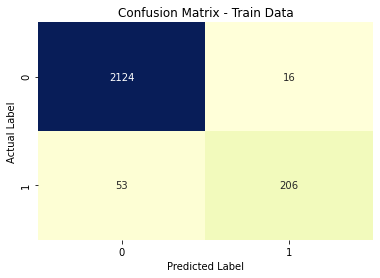



------------------------------------------------------------
AUC: 0.967


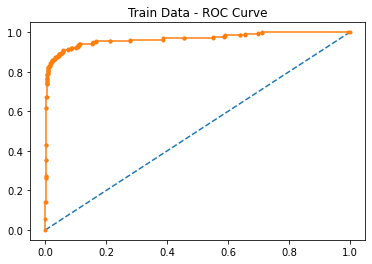



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.9619289340101523


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1055
           1       0.88      0.75      0.81       127

    accuracy                           0.96      1182
   macro avg       0.92      0.87      0.89      1182
weighted avg       0.96      0.96      0.96      1182

------------------------------------------------------------




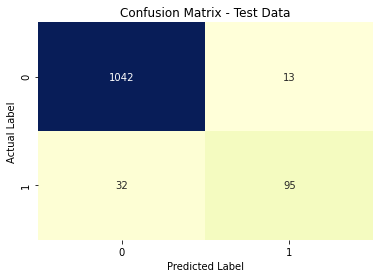



------------------------------------------------------------
AUC: 0.945


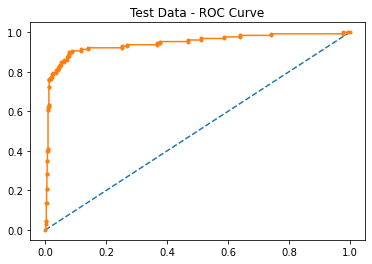



------------------------------------------------------------


In [125]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
final_logit_sklearn_unscaled_metrics,best_model_lr=apply_evl("LogisticRegression_Unscaled",lr,
                                                              param_grid_lr_unscaled,
                                     X_train,X_test,y_train,y_test)

In [126]:
final_logit_sklearn_unscaled_metrics.T[['Accuracy','Precision','Recall','F1','AUC']]

,Accuracy,Precision,Recall,F1,AUC
LogisticRegression_Unscaled_Train,0.971238,0.927928,0.795367,0.856549,0.966781
LogisticRegression_Unscaled_Test,0.961929,0.87963,0.748031,0.808511,0.944762


### Logit Using Sklearn - Scaled Without SMOTE

In [128]:
param_grid_lr_scaled={'penalty':['l1','l2', 'elasticnet', 'none'],
      'solver':['sag','lbfgs','liblinear','newton-cg','saga'],
      'tol':[0.0001,0.00001,0.000001,0.0000001,0.00000001],
      'max_iter':[100,200,300],
               'random_state':[0,1,21,23]}

LogisticRegression_Scaled
--------------------Best Parameters--------------------
{'max_iter': 300, 'penalty': 'none', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(max_iter=300, penalty='none', random_state=0)


Train Accuracy Score for model LogisticRegression() is 0.9624843684868696


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2140
           1       0.94      0.69      0.80       259

    accuracy                           0.96      2399
   macro avg       0.95      0.84      0.89      2399
weighted avg       0.96      0.96      0.96      2399

------------------------------------------------------------




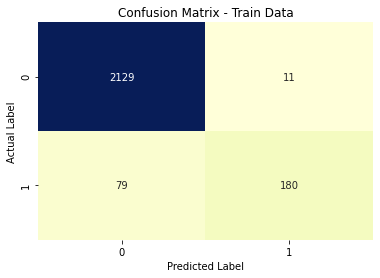



------------------------------------------------------------
AUC: 0.977


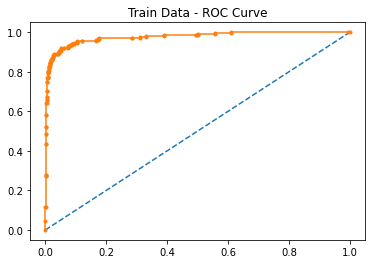



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.9500846023688664


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1055
           1       0.84      0.66      0.74       127

    accuracy                           0.95      1182
   macro avg       0.90      0.82      0.86      1182
weighted avg       0.95      0.95      0.95      1182

------------------------------------------------------------




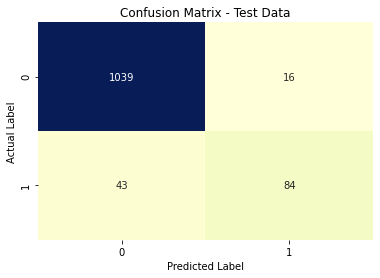



------------------------------------------------------------
AUC: 0.944


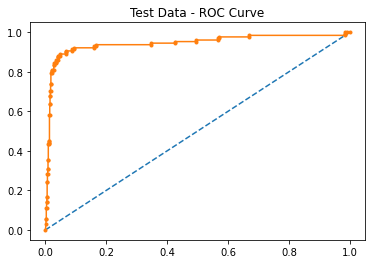



------------------------------------------------------------


In [129]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
final_logit_sklearn_scaled_metrics,best_model_lr=apply_evl("LogisticRegression_Scaled",lr,param_grid_lr_scaled,
                                     X_train_all_scaled,X_test_all_scaled,y_train_all_scaled,y_test_all_scaled)

In [130]:
final_logit_sklearn_scaled_metrics.T[['Accuracy','Precision','Recall','F1','AUC']]

,Accuracy,Precision,Recall,F1,AUC
LogisticRegression_Scaled_Train,0.962484,0.942408,0.694981,0.8,0.976515
LogisticRegression_Scaled_Test,0.950085,0.84,0.661417,0.740088,0.944233


### Logit Using Sklearn - Unscaled With Smote

In [131]:
param_grid_lr_unscaled_smote={'penalty':['l1','l2', 'elasticnet', 'none'],
      'solver':['sag','lbfgs','liblinear','newton-cg','saga'],
      'tol':[0.0001,0.00001,0.000001,0.0000001,0.00000001],
      'max_iter':[100,200,300],
               'random_state':[0,1,21,23]}

LogisticRegression_With_Smote
--------------------Best Parameters--------------------
{'max_iter': 300, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(max_iter=300, random_state=0)


Train Accuracy Score for model LogisticRegression() is 0.9395001167951413


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2140
           1       0.97      0.91      0.94      2141

    accuracy                           0.94      4281
   macro avg       0.94      0.94      0.94      4281
weighted avg       0.94      0.94      0.94      4281

------------------------------------------------------------




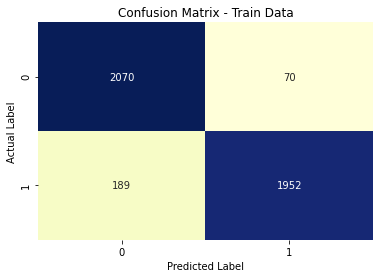



------------------------------------------------------------
AUC: 0.973


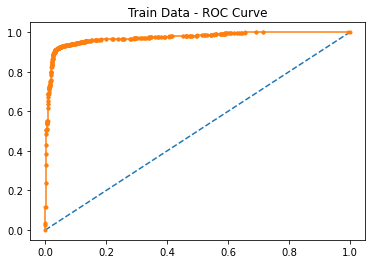



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.9350403034613561


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1055
           1       0.94      0.93      0.93      1054

    accuracy                           0.94      2109
   macro avg       0.94      0.94      0.94      2109
weighted avg       0.94      0.94      0.94      2109

------------------------------------------------------------




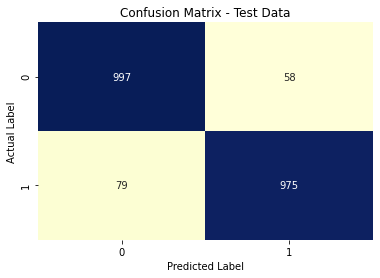



------------------------------------------------------------
AUC: 0.969


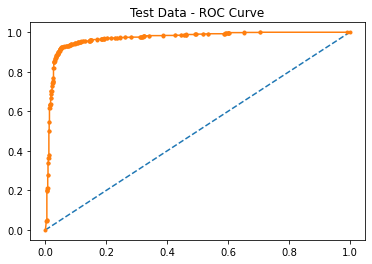



------------------------------------------------------------


In [132]:
from sklearn.linear_model import LogisticRegression
lr_smote = LogisticRegression()
final_logit_sklearn_unscalled_smote_metrics,best_model_lr_smote=apply_evl("LogisticRegression_With_Smote",lr_smote,
                                                                    param_grid_lr_unscaled_smote,
                                     X_train_smote,X_test_smote,y_train_smote,y_test_smote)

In [133]:
final_logit_sklearn_unscalled_smote_metrics.T[['Accuracy','Precision','Recall','F1','AUC']]

,Accuracy,Precision,Recall,F1,AUC
LogisticRegression_With_Smote_Train,0.9395,0.965381,0.911723,0.937785,0.972872
LogisticRegression_With_Smote_Test,0.93504,0.943853,0.925047,0.934356,0.968673


### Logit Using Sklearn - Scaled With Smote

In [134]:
param_grid_lr_scaled_smote={'penalty':['l1','l2', 'elasticnet', 'none'],
      'solver':['sag','lbfgs','liblinear','newton-cg','saga'],
      'tol':[0.0001,0.00001,0.000001,0.0000001,0.00000001],
      'max_iter':[100,200,300],
               'random_state':[0,1,21,23]}

LogisticRegression_Scaled_With_Smote
--------------------Best Parameters--------------------
{'max_iter': 300, 'penalty': 'none', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(max_iter=300, penalty='none', random_state=0)


Train Accuracy Score for model LogisticRegression() is 0.9364634431207661


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2140
           1       0.92      0.96      0.94      2141

    accuracy                           0.94      4281
   macro avg       0.94      0.94      0.94      4281
weighted avg       0.94      0.94      0.94      4281

------------------------------------------------------------




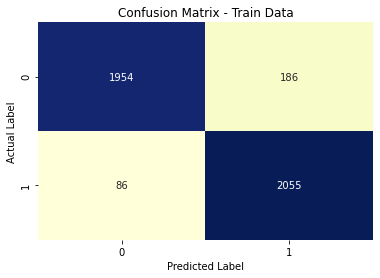



------------------------------------------------------------
AUC: 0.982


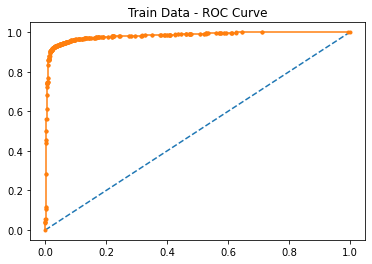



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.9274537695590327


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1055
           1       0.90      0.96      0.93      1054

    accuracy                           0.93      2109
   macro avg       0.93      0.93      0.93      2109
weighted avg       0.93      0.93      0.93      2109

------------------------------------------------------------




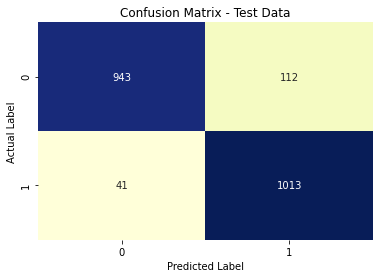



------------------------------------------------------------
AUC: 0.975


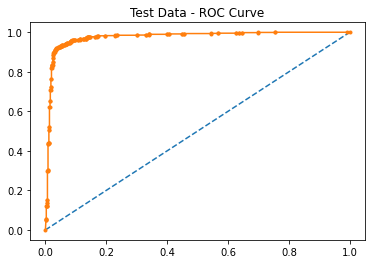



------------------------------------------------------------


In [135]:
from sklearn.linear_model import LogisticRegression
lr_smote = LogisticRegression()
final_logit_sklearn_scalled_smote_metrics,best_model_lr_smote=apply_evl("LogisticRegression_Scaled_With_Smote",
                                                                        lr_smote,
                                                                    param_grid_lr_scaled_smote,
                                     X_train_smote_all_scaled,X_test_smote_all_scaled,
                                                                        y_train_smote_all_scaled,
                                                                        y_test_smote_all_scaled)

In [136]:
final_logit_sklearn_scalled_smote_metrics.T[['Accuracy','Precision','Recall','F1','AUC']]

,Accuracy,Precision,Recall,F1,AUC
LogisticRegression_Scaled_With_Smote_Train,0.936463,0.917001,0.959832,0.937928,0.982399
LogisticRegression_Scaled_With_Smote_Test,0.927454,0.900444,0.961101,0.929784,0.975394


### Linear Discriminant Analysis using sklearn
Linear Discriminant Analysis (LDA) finds it's coefficients using the variation between the classes (check this), so the scaling doesn't matter.

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [138]:
param_grid_lda = {'solver': ['svd', 'lsqr', 'eigen'],
              'shrinkage': ['auto', 'none', 'default'],
              'tol': [0.000001, 0.0000001, 0.000000001]}

LDA
--------------------Best Parameters--------------------
{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-06}


--------------------Best Model Params--------------------
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=1e-06)


Train Accuracy Score for model LinearDiscriminantAnalysis() is 0.8920383493122134


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2140
           1       0.50      0.01      0.02       259

    accuracy                           0.89      2399
   macro avg       0.70      0.51      0.48      2399
weighted avg       0.85      0.89      0.84      2399

------------------------------------------------------------




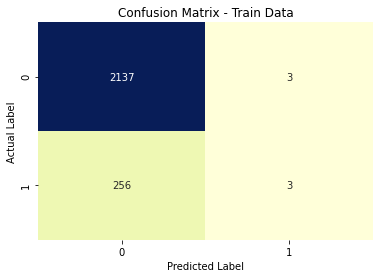



------------------------------------------------------------
AUC: 0.740


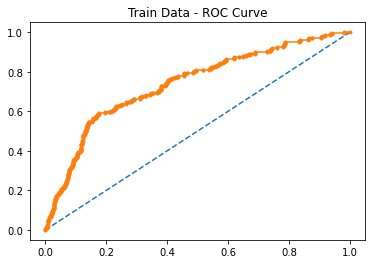



------------------------------------------------------------


Test Accuracy Score for model LinearDiscriminantAnalysis() is 0.8900169204737732


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1055
           1       0.33      0.02      0.04       127

    accuracy                           0.89      1182
   macro avg       0.61      0.51      0.49      1182
weighted avg       0.83      0.89      0.85      1182

------------------------------------------------------------




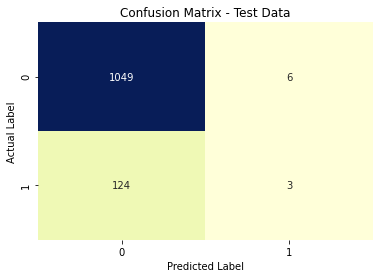



------------------------------------------------------------
AUC: 0.683


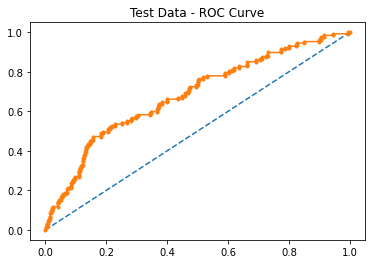



------------------------------------------------------------


In [139]:
lda = LinearDiscriminantAnalysis()
lda_metrics_df,best_model_lda=apply_evl("LDA",lda,param_grid_lda,X_train,X_test,
          y_train,y_test)

In [140]:
lda_metrics_df.T[['Accuracy','Precision','Recall','F1','AUC']]

,Accuracy,Precision,Recall,F1,AUC
LDA_Train,0.892038,0.5,0.011583,0.0226415,0.740082
LDA_Test,0.890017,0.333333,0.023622,0.0441176,0.683203


### LDA with Smote using sklearn

In [141]:
param_grid_lda_smote = {'solver': ['svd', 'lsqr', 'eigen'],
              'shrinkage': ['auto', 'none', 'default'],
              'tol': [0.000001, 0.0000001, 0.000000001]}

LDA_With_Smote
--------------------Best Parameters--------------------
{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-06}


--------------------Best Model Params--------------------
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=1e-06)


Train Accuracy Score for model LinearDiscriminantAnalysis() is 0.6598925484699837


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.74      0.49      0.59      2140
           1       0.62      0.83      0.71      2141

    accuracy                           0.66      4281
   macro avg       0.68      0.66      0.65      4281
weighted avg       0.68      0.66      0.65      4281

------------------------------------------------------------




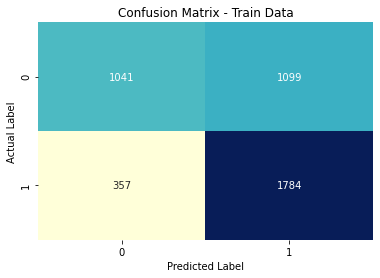



------------------------------------------------------------
AUC: 0.725


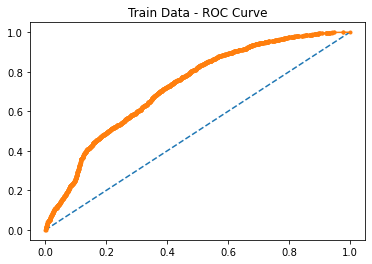



------------------------------------------------------------


Test Accuracy Score for model LinearDiscriminantAnalysis() is 0.6429587482219061


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.72      0.47      0.57      1055
           1       0.61      0.81      0.70      1054

    accuracy                           0.64      2109
   macro avg       0.66      0.64      0.63      2109
weighted avg       0.66      0.64      0.63      2109

------------------------------------------------------------




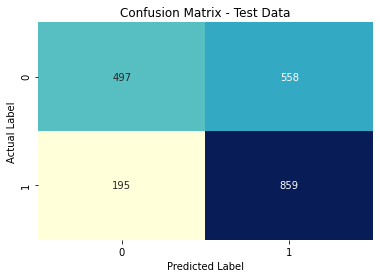



------------------------------------------------------------
AUC: 0.703


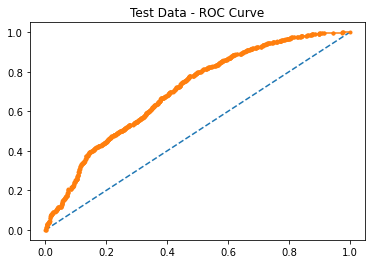



------------------------------------------------------------


In [142]:
lda_smote = LinearDiscriminantAnalysis()
lda_metrics_df_smote,best_model_lda_smote=apply_evl("LDA_With_Smote",lda_smote,param_grid_lda_smote,X_train_smote,
                                                    X_test_smote,y_train_smote,y_test_smote)

In [143]:
lda_metrics_df_smote.T[['Accuracy','Precision','Recall','F1','AUC']]

,Accuracy,Precision,Recall,F1,AUC
LDA_With_Smote_Train,0.659893,0.6188,0.833255,0.710191,0.724862
LDA_With_Smote_Test,0.642959,0.60621,0.814991,0.695265,0.702944


### Random Forest using sklearn
Tree based models are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.

In [144]:
param_grid_rf = {
    'max_depth': [10,20,30],
    'max_features': [2,3,4,5,6,7,8],
    'min_samples_leaf': [25,50,75,100],
    'min_samples_split': [25,50,75,100],
    'n_estimators': [50,100,150]
}

RandomForest
--------------------Best Parameters--------------------
{'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 75, 'min_samples_split': 100, 'n_estimators': 150}


--------------------Best Model Params--------------------
RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=75,
                       min_samples_split=100, n_estimators=150)


Train Accuracy Score for model RandomForestClassifier() is 0.9812421842434348


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2140
           1       0.92      0.90      0.91       259

    accuracy                           0.98      2399
   macro avg       0.96      0.95      0.95      2399
weighted avg       0.98      0.98      0.98      2399

------------------------------------------------------------




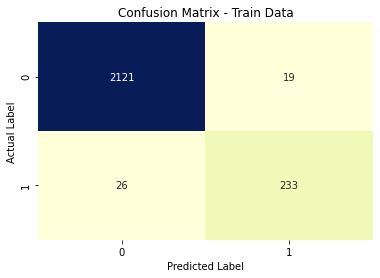



------------------------------------------------------------
AUC: 0.993


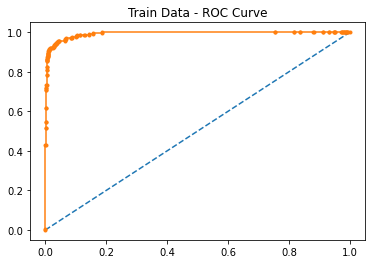



------------------------------------------------------------


Test Accuracy Score for model RandomForestClassifier() is 0.9737732656514383


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1055
           1       0.90      0.85      0.87       127

    accuracy                           0.97      1182
   macro avg       0.94      0.92      0.93      1182
weighted avg       0.97      0.97      0.97      1182

------------------------------------------------------------




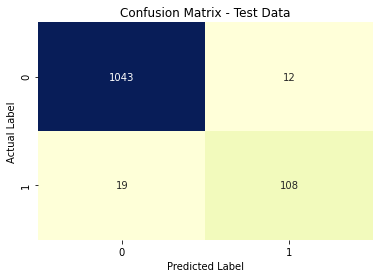



------------------------------------------------------------
AUC: 0.985


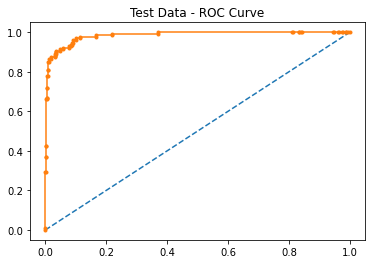



------------------------------------------------------------


In [145]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_metrics_df,best_model_rf=apply_evl("RandomForest",rf_model,param_grid_rf,
                                             X_train,X_test,y_train,y_test)

In [146]:
rf_metrics_df.T[['Accuracy','Precision','Recall','F1','AUC']]

,Accuracy,Precision,Recall,F1,AUC
RandomForest_Train,0.981242,0.924603,0.899614,0.911937,0.992758
RandomForest_Test,0.973773,0.9,0.850394,0.874494,0.98467


### RandomFirst with Smote using sklearn

In [147]:
param_grid_rf_smote = {
    'max_depth': [10,20,30],
    'max_features': [2,3,4,5,6,7,8],
    'min_samples_leaf': [25,50,75,100],
    'min_samples_split': [25,50,75,100],
    'n_estimators': [50,100,150]
}

RF_With_Smote
--------------------Best Parameters--------------------
{'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 150}


--------------------Best Model Params--------------------
RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=25,
                       min_samples_split=25, n_estimators=150)


Train Accuracy Score for model RandomForestClassifier() is 0.9794440551273067


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2140
           1       0.98      0.97      0.98      2141

    accuracy                           0.98      4281
   macro avg       0.98      0.98      0.98      4281
weighted avg       0.98      0.98      0.98      4281

------------------------------------------------------------




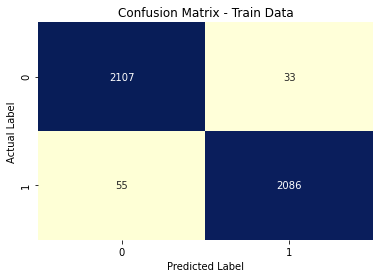



------------------------------------------------------------
AUC: 0.998


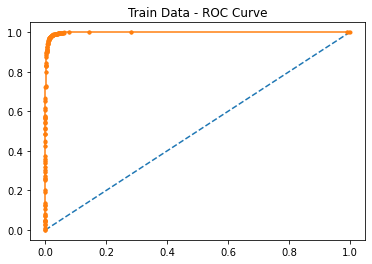



------------------------------------------------------------


Test Accuracy Score for model RandomForestClassifier() is 0.9724988146040777


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1055
           1       0.97      0.98      0.97      1054

    accuracy                           0.97      2109
   macro avg       0.97      0.97      0.97      2109
weighted avg       0.97      0.97      0.97      2109

------------------------------------------------------------




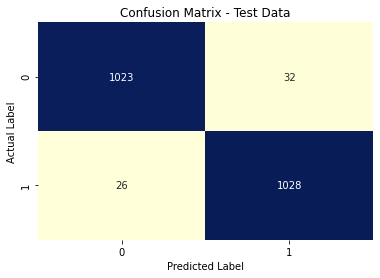



------------------------------------------------------------
AUC: 0.996


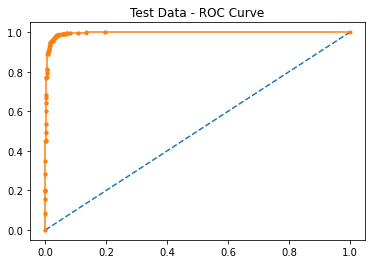



------------------------------------------------------------


In [148]:
from sklearn.ensemble import RandomForestClassifier
rf_model_smote = RandomForestClassifier()
rf_metrics_df_smote,best_model_rf_smote=apply_evl("RF_With_Smote",rf_model_smote,param_grid_rf_smote,
                                             X_train_smote,X_test_smote,
          y_train_smote,y_test_smote)

In [149]:
rf_metrics_df_smote.T[['Accuracy','Precision','Recall','F1','AUC']]

,Accuracy,Precision,Recall,F1,AUC
RF_With_Smote_Train,0.979444,0.984427,0.974311,0.979343,0.998394
RF_With_Smote_Test,0.972499,0.969811,0.975332,0.972564,0.996065


### Few modifications in column names

In [150]:
final_logit_sm_metrics.columns=['Accuracy','Precision','Recall','F1','AUC']
final_logit_sm_metrics

,Accuracy,Precision,Recall,F1,AUC
Logit_SM_Train,0.958316,0.760656,0.895753,0.822695,0.975275
Logit_SM_Test,0.952623,0.726115,0.897638,0.802817,0.956256


In [151]:
final_logit_sm_smote_metrics.columns=['Accuracy','Precision','Recall','F1','AUC']
final_logit_sm_smote_metrics

,Accuracy,Precision,Recall,F1,AUC
Logit_SM_Train_SMOTE,0.950245,0.979125,0.920131,0.948712,0.981177
Logit_SM_Test_SMOTE,0.945472,0.962562,0.926945,0.944418,0.974799


### Comparison

In [152]:
data_df=pd.concat([final_logit_sm_metrics,
                   final_logit_sm_smote_metrics, 
                   final_logit_sklearn_unscaled_metrics.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   final_logit_sklearn_scaled_metrics.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   final_logit_sklearn_unscalled_smote_metrics.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   final_logit_sklearn_scalled_smote_metrics.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   lda_metrics_df.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   lda_metrics_df_smote.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   rf_metrics_df.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   rf_metrics_df_smote.T[['Accuracy','Precision','Recall','F1','AUC']]],axis=0)

In [153]:
data_df

,Accuracy,Precision,Recall,F1,AUC
Logit_SM_Train,0.958316,0.760656,0.895753,0.822695,0.975275
Logit_SM_Test,0.952623,0.726115,0.897638,0.802817,0.956256
Logit_SM_Train_SMOTE,0.950245,0.979125,0.920131,0.948712,0.981177
Logit_SM_Test_SMOTE,0.945472,0.962562,0.926945,0.944418,0.974799
LogisticRegression_Unscaled_Train,0.971238,0.927928,0.795367,0.856549,0.966781
LogisticRegression_Unscaled_Test,0.961929,0.87963,0.748031,0.808511,0.944762
LogisticRegression_Scaled_Train,0.962484,0.942408,0.694981,0.8,0.976515
LogisticRegression_Scaled_Test,0.950085,0.84,0.661417,0.740088,0.944233
LogisticRegression_With_Smote_Train,0.9395,0.965381,0.911723,0.937785,0.972872
LogisticRegression_With_Smote_Test,0.93504,0.943853,0.925047,0.934356,0.968673


### Best Models

In [154]:
data_df.sort_values(by='Accuracy',ascending=False)

,Accuracy,Precision,Recall,F1,AUC
RandomForest_Train,0.981242,0.924603,0.899614,0.911937,0.992758
RF_With_Smote_Train,0.979444,0.984427,0.974311,0.979343,0.998394
RandomForest_Test,0.973773,0.9,0.850394,0.874494,0.98467
RF_With_Smote_Test,0.972499,0.969811,0.975332,0.972564,0.996065
LogisticRegression_Unscaled_Train,0.971238,0.927928,0.795367,0.856549,0.966781
LogisticRegression_Scaled_Train,0.962484,0.942408,0.694981,0.8,0.976515
LogisticRegression_Unscaled_Test,0.961929,0.87963,0.748031,0.808511,0.944762
Logit_SM_Train,0.958316,0.760656,0.895753,0.822695,0.975275
Logit_SM_Test,0.952623,0.726115,0.897638,0.802817,0.956256
Logit_SM_Train_SMOTE,0.950245,0.979125,0.920131,0.948712,0.981177


In [155]:
data_df.sort_values(by='AUC',ascending=False)

,Accuracy,Precision,Recall,F1,AUC
RF_With_Smote_Train,0.979444,0.984427,0.974311,0.979343,0.998394
RF_With_Smote_Test,0.972499,0.969811,0.975332,0.972564,0.996065
RandomForest_Train,0.981242,0.924603,0.899614,0.911937,0.992758
RandomForest_Test,0.973773,0.9,0.850394,0.874494,0.98467
LogisticRegression_Scaled_With_Smote_Train,0.936463,0.917001,0.959832,0.937928,0.982399
Logit_SM_Train_SMOTE,0.950245,0.979125,0.920131,0.948712,0.981177
LogisticRegression_Scaled_Train,0.962484,0.942408,0.694981,0.8,0.976515
LogisticRegression_Scaled_With_Smote_Test,0.927454,0.900444,0.961101,0.929784,0.975394
Logit_SM_Train,0.958316,0.760656,0.895753,0.822695,0.975275
Logit_SM_Test_SMOTE,0.945472,0.962562,0.926945,0.944418,0.974799


### Best Model on Train Data

In [156]:
data_df[0::2].sort_values(by='Accuracy',ascending=False)

,Accuracy,Precision,Recall,F1,AUC
RandomForest_Train,0.981242,0.924603,0.899614,0.911937,0.992758
RF_With_Smote_Train,0.979444,0.984427,0.974311,0.979343,0.998394
LogisticRegression_Unscaled_Train,0.971238,0.927928,0.795367,0.856549,0.966781
LogisticRegression_Scaled_Train,0.962484,0.942408,0.694981,0.8,0.976515
Logit_SM_Train,0.958316,0.760656,0.895753,0.822695,0.975275
Logit_SM_Train_SMOTE,0.950245,0.979125,0.920131,0.948712,0.981177
LogisticRegression_With_Smote_Train,0.9395,0.965381,0.911723,0.937785,0.972872
LogisticRegression_Scaled_With_Smote_Train,0.936463,0.917001,0.959832,0.937928,0.982399
LDA_Train,0.892038,0.5,0.011583,0.0226415,0.740082
LDA_With_Smote_Train,0.659893,0.6188,0.833255,0.710191,0.724862


### Best Model on Test Data

In [157]:
data_df[1::2].sort_values(by='Accuracy',ascending=False)

,Accuracy,Precision,Recall,F1,AUC
RandomForest_Test,0.973773,0.9,0.850394,0.874494,0.98467
RF_With_Smote_Test,0.972499,0.969811,0.975332,0.972564,0.996065
LogisticRegression_Unscaled_Test,0.961929,0.87963,0.748031,0.808511,0.944762
Logit_SM_Test,0.952623,0.726115,0.897638,0.802817,0.956256
LogisticRegression_Scaled_Test,0.950085,0.84,0.661417,0.740088,0.944233
Logit_SM_Test_SMOTE,0.945472,0.962562,0.926945,0.944418,0.974799
LogisticRegression_With_Smote_Test,0.93504,0.943853,0.925047,0.934356,0.968673
LogisticRegression_Scaled_With_Smote_Test,0.927454,0.900444,0.961101,0.929784,0.975394
LDA_Test,0.890017,0.333333,0.023622,0.0441176,0.683203
LDA_With_Smote_Test,0.642959,0.60621,0.814991,0.695265,0.702944


In [158]:
data_df['Accuracy']

Logit_SM_Train                                0.958316
Logit_SM_Test                                 0.952623
Logit_SM_Train_SMOTE                          0.950245
Logit_SM_Test_SMOTE                           0.945472
LogisticRegression_Unscaled_Train             0.971238
LogisticRegression_Unscaled_Test              0.961929
LogisticRegression_Scaled_Train               0.962484
LogisticRegression_Scaled_Test                0.950085
LogisticRegression_With_Smote_Train             0.9395
LogisticRegression_With_Smote_Test             0.93504
LogisticRegression_Scaled_With_Smote_Train    0.936463
LogisticRegression_Scaled_With_Smote_Test     0.927454
LDA_Train                                     0.892038
LDA_Test                                      0.890017
LDA_With_Smote_Train                          0.659893
LDA_With_Smote_Test                           0.642959
RandomForest_Train                            0.981242
RandomForest_Test                             0.973773
RF_With_Sm

In [159]:
data_df_org=data_df.copy()

In [160]:
data_df.Accuracy=data_df.Accuracy.astype(float)

In [161]:
data_df.Precision=data_df.Precision.astype(float)
data_df.Recall=data_df.Recall.astype(float)
data_df.F1=data_df.F1.astype(float)
data_df.AUC=data_df.AUC.astype(float)

In [162]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Logit_SM_Train to RF_With_Smote_Test
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Accuracy   20 non-null     float64
 1   Precision  20 non-null     float64
 2   Recall     20 non-null     float64
 3   F1         20 non-null     float64
 4   AUC        20 non-null     float64
dtypes: float64(5)
memory usage: 1.6+ KB


### Comparison

<AxesSubplot:>

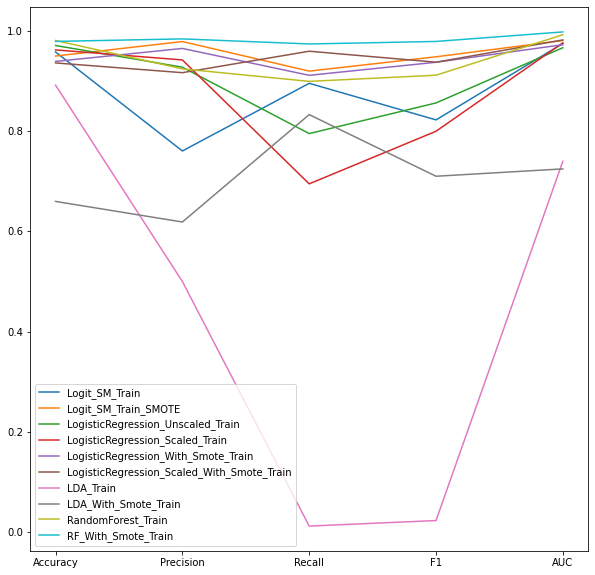

In [163]:
plt.figure(figsize=(10,10))
sns.lineplot(data=data_df[0::2].T,dashes=False)

<AxesSubplot:>

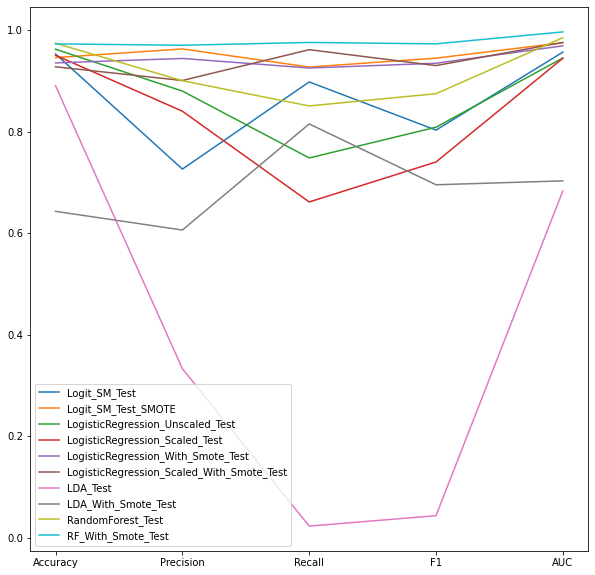

In [164]:
plt.figure(figsize=(10,10))
sns.lineplot(data=data_df[1::2].T,dashes=False)

# Problem 2

In [170]:
stock_prices=pd.read_csv('Market+Risk+Dataset.csv')

In [171]:
stock_prices.head(5)

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


### Fixing messy column names (containing spaces) for ease of use

In [172]:
stock_prices.columns = stock_prices.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')

### Checking top 5 rows again

In [173]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


### First, let us check the number of rows (observations) and the number of columns (variables)

In [174]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


### Checking data types of all columns

In [175]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [176]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


### Lets us plot & see price trend over time for different companies

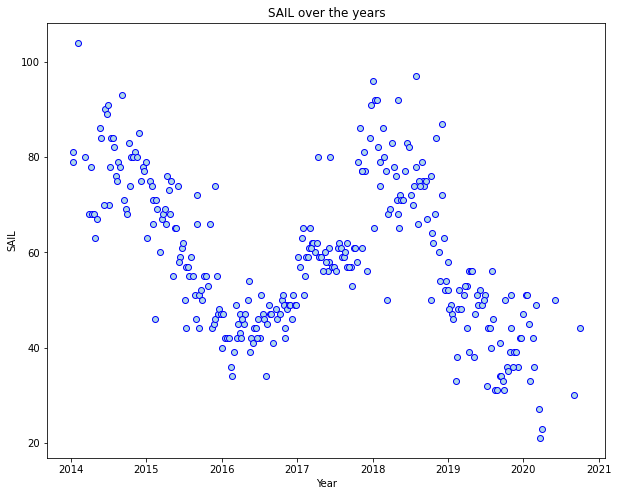

In [178]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['SAIL'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('SAIL over the years')
plt.show()

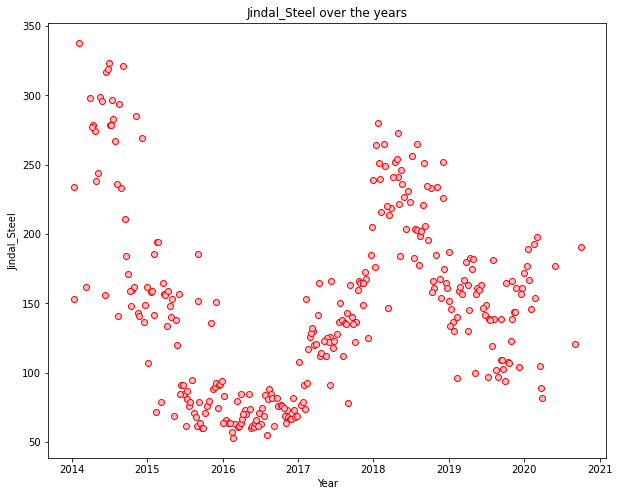

In [179]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Jindal_Steel'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Jindal_Steel')
plt.title('Jindal_Steel over the years')
plt.show()

### Analyzing returns

Steps for calculating returns from prices:

* Take logarithms

* Take differences

In [180]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

### Checking the rows & columns of dataset

In [181]:
stock_returns.shape

(314, 10)

### Checking top 5 rows

In [182]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


### We now look at Means & Standard Deviations of these returns

* Stock Means: Average returns that the stock is making on a week to week basis

* Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

### Calculating stock means

In [190]:
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree_Cement           0.003681
Infosys                0.002794
Axis_Bank              0.001167
Indian_Hotel           0.000266
Sun_Pharma            -0.001455
Mahindra_&_Mahindra   -0.001506
SAIL                  -0.003463
Jindal_Steel          -0.004123
Jet_Airways           -0.009548
Idea_Vodafone         -0.010608
dtype: float64

### Calculating stock standard deviation

In [191]:
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea_Vodafone          0.104315
Jet_Airways            0.097972
Jindal_Steel           0.075108
SAIL                   0.062188
Indian_Hotel           0.047131
Axis_Bank              0.045828
Sun_Pharma             0.045033
Mahindra_&_Mahindra    0.040169
Shree_Cement           0.039917
Infosys                0.035070
dtype: float64

In [185]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


### Let us plot & see what they say about stock prices

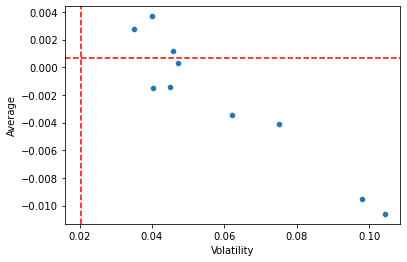

In [186]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.020257,linestyle='--', color = "red")
plot.axhline(y=0.000683,linestyle='--', color = "red")
plt.show()

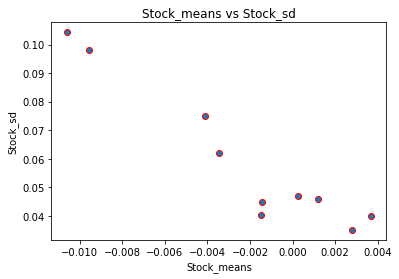

In [189]:
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('Stock_means')
plt.ylabel('Stock_sd')
plt.title('Stock_means vs Stock_sd')
plt.show()

In [187]:
df.loc['Jet_Airways'][0]

-0.009548127105672136

In [188]:
df[df['Average'] > df.loc['Jet_Airways'][0]].sort_values(by = 'Volatility')

,Average,Volatility
Infosys,0.002794,0.035070
Shree_Cement,0.003681,0.039917
Mahindra_&_Mahindra,-0.001506,0.040169
Sun_Pharma,-0.001455,0.045033
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
SAIL,-0.003463,0.062188
Jindal_Steel,-0.004123,0.075108


Stock with a lower mean & higher standard deviation do not play a role in a portfolio that has competing stock with more returns & less risk. Thus for the data we have here, we are only left few stocks:

* Ones with higher return for a comparative or lower risk are considered better